In [1]:
!pip install scikit-garden
!pip install setuptools numpy scipy scikit-learn cython

  Using cached scikit-garden-0.1.3.tar.gz (317 kB)
  Running setup.py clean for scikit-garden
Failed to build scikit-garden
    Running setup.py install for scikit-garden: started
    Running setup.py install for scikit-garden: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Wayne Linn\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Wayne Linn\\AppData\\Local\\Temp\\pip-install-6a8ac02w\\scikit-garden\\setup.py'"'"'; __file__='"'"'C:\\Users\\Wayne Linn\\AppData\\Local\\Temp\\pip-install-6a8ac02w\\scikit-garden\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Wayne Linn\AppData\Local\Temp\pip-wheel-g82r6zi2'
       cwd: C:\Users\Wayne Linn\AppData\Local\Temp\pip-install-6a8ac02w\scikit-garden\
  Complete output (164 lines):
  Appending skgarden.mondrian.tree configuration to skgarden.mondrian
  Ignoring attempt to set 'name' (from 'skgarden.mondrian' to 'skgarden.mondrian.tree')
  Appending skgarden.mondrian.ensemble configuration to skgarden.mondrian
  Ignoring attempt to set 'name' (from 'skg

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from skgarden import RandomForestQuantileRegressor

import warnings
warnings.filterwarnings("ignore")

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
np.random.seed(42)

# 1. Import the train datasets

In [33]:
X_train = pd.read_csv("data-train.csv",index_col=0)
Y_train = X_train.sales
X_train = X_train.drop(['sales'],axis=1)

In [34]:
#Model_1 = RandomForestQuantileRegressor(n_estimators=100)

# 2. Setup Pipeline (Not Used)

# Quantile Regression Forest is not stable and does not work well with GridSearchCV

In [5]:

#RG = Model_1

In [6]:
#pipe = Pipeline(steps=[("RG",RG)])

In [7]:
#param_grid = {
    #"pca__n_components": [50, 100,170]
}

# 3. Setup GridSearch (Not Used)

In [71]:
#score_metric = 'neg_mean_squared_error'
#search = GridSearchCV(pipe,param_grid,
#                      n_jobs=-1,
#                      cv=10,
#                      scoring=score_metric)

In [72]:
#search.fit(X_train,Y_train.values.ravel())

In [ ]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
#df = pd.DataFrame(search.cv_results_)
#df = df.sort_values(by=['rank_test_score'])
#df

# 4. Best Hyperparameter (Not Used)

In [ ]:
#parms = pd.DataFrame(df['params'])
#for i in parms.iloc[0]:
#    print(i)

# 5. Evaluate Model 

In [35]:

best_n_est=1000

In [36]:
Model_2 = RandomForestQuantileRegressor(n_estimators=best_n_est)

In [37]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [38]:
RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

RandomForestQuantileRegressor(n_estimators=1000)

In [39]:
MSE(RG1.predict(X_test1),Y_test1)

311.97975670410364

In [40]:
result = pd.DataFrame(Y_test1)

In [41]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [42]:
MSE(result["sales"],result["Predicted_sales"])

311.97975670410364

# 6. Inventory Decision

In [43]:
residual = result['sales']-result['Predicted_sales']

In [44]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [45]:
import scipy.stats as sct

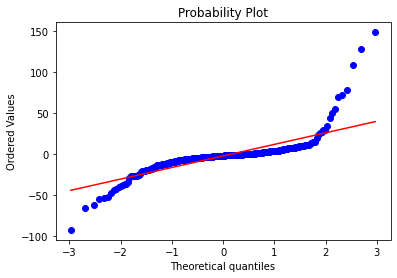

In [46]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [47]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

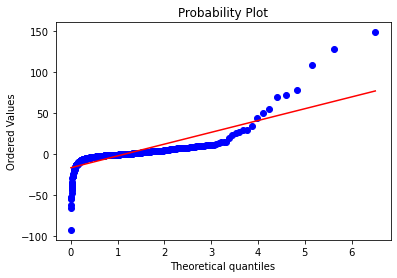

In [48]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [49]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

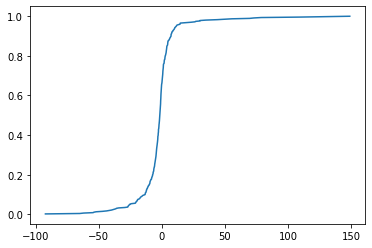

In [50]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

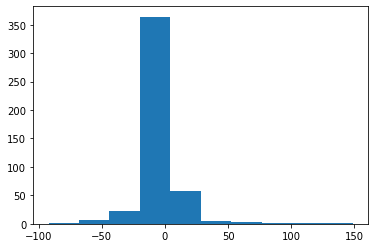

In [51]:
plt.hist(Sample)
plt.show()

In [52]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [53]:
offset = inv(Sample,jumps,2/3)
offset

0.13400000000000034

In [54]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [55]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [56]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [68]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

60040.0

In [57]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

52956.0

In [58]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

59636.0

In [59]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

60012.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [60]:
Model_4 = RandomForestQuantileRegressor(n_estimators=best_n_est)

In [61]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [62]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.730234,0.707442,0.583204,0.628498,0.555761,0.718705,0.690083,0.662272,0.604062,0.667307,0.654757
Exponential,0.778658,0.753403,0.718680,0.748240,0.726753,0.769924,0.758863,0.727320,0.710183,0.742124,0.743415
Empirical,0.786101,0.749779,0.718334,0.740773,0.709750,0.771461,0.745630,0.725585,0.714746,0.741740,0.740390


In [63]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,30220.0,32016.0,27000.0,29288.0,27588.0,28064.0,33792.0,30544.0,27004.0,27792.0,29330.8,2173.330016
Exponential,32224.0,34096.0,33272.0,34868.0,36076.0,30064.0,37160.0,33544.0,31748.0,30908.0,33396.0,2131.337984
Empirical,32532.0,33932.0,33256.0,34520.0,35232.0,30124.0,36512.0,33464.0,31952.0,30892.0,33241.6,1849.986119
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [64]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,152.837849
Dataset_2,263.909447
Dataset_3,788.329781
Dataset_4,659.787530
Dataset_5,1209.349022
Dataset_6,154.558192
Dataset_7,383.712739
Dataset_8,400.800399
Dataset_9,569.467388
Dataset_10,266.010168


In [65]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  484.8762514796816


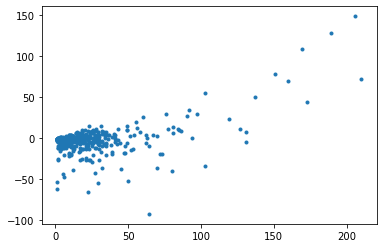

In [67]:
plt.plot(result['sales'],residual,".")

In [69]:
name = "5.1_Quantile_regression_forest(No_PCA).csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [70]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")